<a href="https://colab.research.google.com/github/agolbeny/Alert-app-1/blob/main/handwrittendigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()


In [5]:
x_train.shape

x_test.shape

(10000, 28, 28)

In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
print(y_train.shape)

(60000,)


In [8]:
print(x_test.shape)

(10000, 28, 28)


In [9]:
print(y_test.shape)

(10000,)


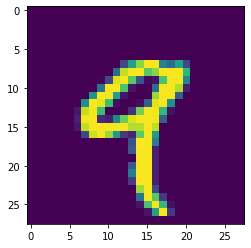

In [10]:
plt.imshow(x_train[4])

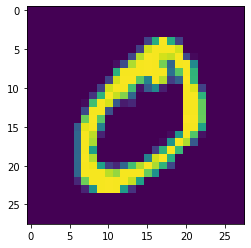

In [11]:
plt.imshow(x_train[1])

In [12]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
print(train_labels.shape)

(60000, 10)


In [13]:
print(test_labels.shape)


(10000, 10)


In [14]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

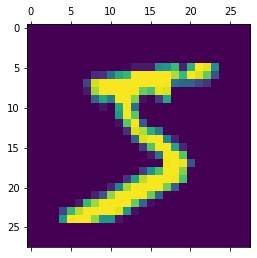

In [15]:
plt.matshow(X_train[0])

In [16]:
y_train[0]

5

In [17]:
x_train = x_train / 255
x_test = x_test / 255

In [33]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [36]:
print(test_labels.shape)

(10000, 10)


(60000, 784)

In [37]:
len(x_train)


60000

In [39]:
# Develop our own Convnet
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add( layers.Conv2D( 18, ( 3, 3 ), activation = 'relu', input_shape = x_train[0, :, :, :].shape))
model.add( layers.Conv2D( 3, ( 3, 3 ), activation = 'relu' ) )
model.add( layers.Flatten() )
model.add( layers.Dense( 10, activation = 'softmax' ) )

IndexError: ignored

In [39]:
model.summary()



In [39]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, train_labels, epochs = 5, batch_size = 128, validation_data = (x_test, test_labels))

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [41]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [42]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [43]:
x_test_vgg_output = conv_base.predict(x_test, verbose = 1)
x_train_vgg_output = conv_base.predict(x_train, verbose = 1)

ValueError: ignored

In [ ]:
print(x_test_vgg_output.shape)
print(x_train_vgg_output.shape)

In [ ]:
import numpy as np
x_test_new = np.reshape(x_test_vgg_output, (10000, 1 * 1 * 512))
x_train_new = np.reshape(x_train_vgg_output, (50000, 1 * 1 * 512))

In [ ]:
print(x_test_new.shape)
print(x_train_new.shape)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

new_model = models.Sequential()
new_model.add(layers.Dense(256, activation='relu', input_dim = 1 * 1 * 512))
new_model.add(layers.Dropout(0.5))
new_model.add(layers.Dense(10, activation = 'softmax'))

new_model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = new_model.fit(x_train_new, train_labels, epochs=32, batch_size=128, validation_data=(x_test_new, test_labels))

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()